In [18]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Import libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

In [ ]:
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/daq_csv_file')
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/daq_csv_file')

In [ ]:
temp = pd.read_csv("temperature.csv")
temp.head()

,id,ts,lat,lon,temp
0,1,2024-04-25 12:00:21,13.7563,100.56,34.7
1,2,2024-04-25 13:00:21,13.7563,100.56,36.2
2,3,2024-04-25 14:00:22,13.7563,100.56,38.5
3,4,2024-04-25 15:00:22,13.7563,100.56,37.6
4,5,2024-04-25 16:00:22,13.7563,100.56,37.3


In [ ]:
motion = pd.read_csv("motion.csv")
motion.head()

,id,ts,lat,lon,sensor
0,1,2024-04-25 13:02:53,13.7563,100.502,1
1,2,2024-04-25 13:10:45,13.7563,100.502,1
2,3,2024-04-25 13:14:26,13.7563,100.502,1
3,4,2024-04-25 13:16:48,13.7563,100.502,1
4,5,2024-04-25 13:21:26,13.7563,100.502,1


In [ ]:
detect = pd.read_csv("Motion_Detection.csv")
detect.head()

,id,ts,lat,lon,temp,sensor
0,1,2024-04-25 23:55:01,13.7563,100.502,36.53,145
1,2,2024-04-26 23:55:01,13.7563,100.502,35.78,311
2,3,2024-04-27 23:55:01,13.7563,100.502,36.18,55
3,4,2024-04-28 23:55:01,13.7563,100.502,36.17,15
4,5,2024-04-29 23:55:01,13.7563,100.502,36.42,15


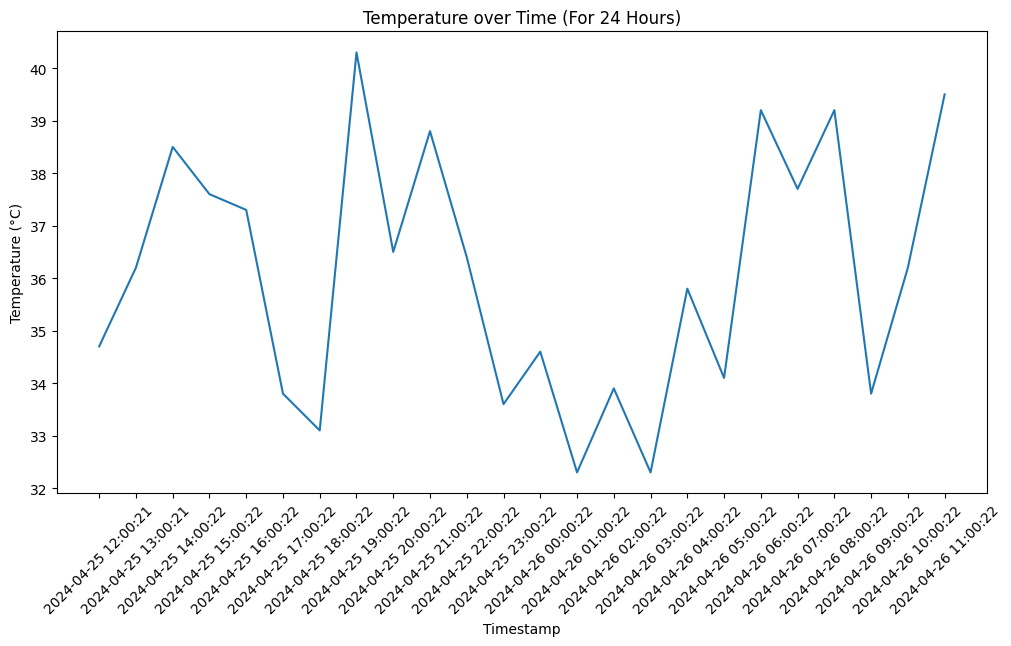

In [21]:
# Create a line plot in 24 hours.
plt.figure(figsize=(12, 6))
plt.plot(temp['ts'][:24], temp['temp'][:24])
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Temperature over Time (For 24 Hours)')
plt.xticks(rotation=45)
plt.show()

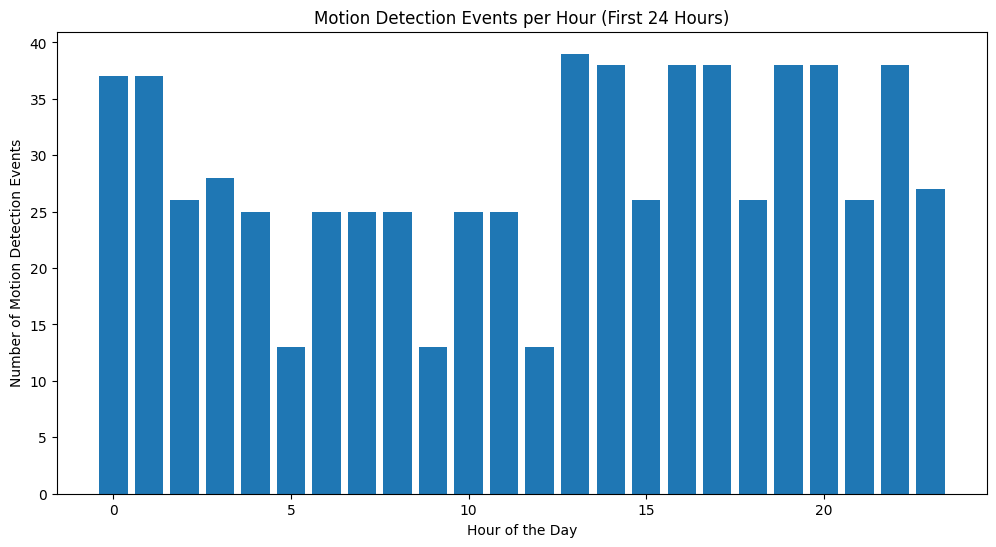

In [30]:
# Assuming 'motion' is your DataFrame containing motion detection data
# Convert timestamp column to datetime
motion['ts'] = pd.to_datetime(motion['ts'])

# Count the number of events per hour
events_per_hour = motion.groupby(motion['ts'].dt.hour).size()

# Create a bar chart for the first 20 hours
plt.figure(figsize=(12, 6))
plt.bar(events_per_hour.index[:24], events_per_hour.values[:24])
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Motion Detection Events')
plt.title('Motion Detection Events per Hour (First 24 Hours)')
plt.show()

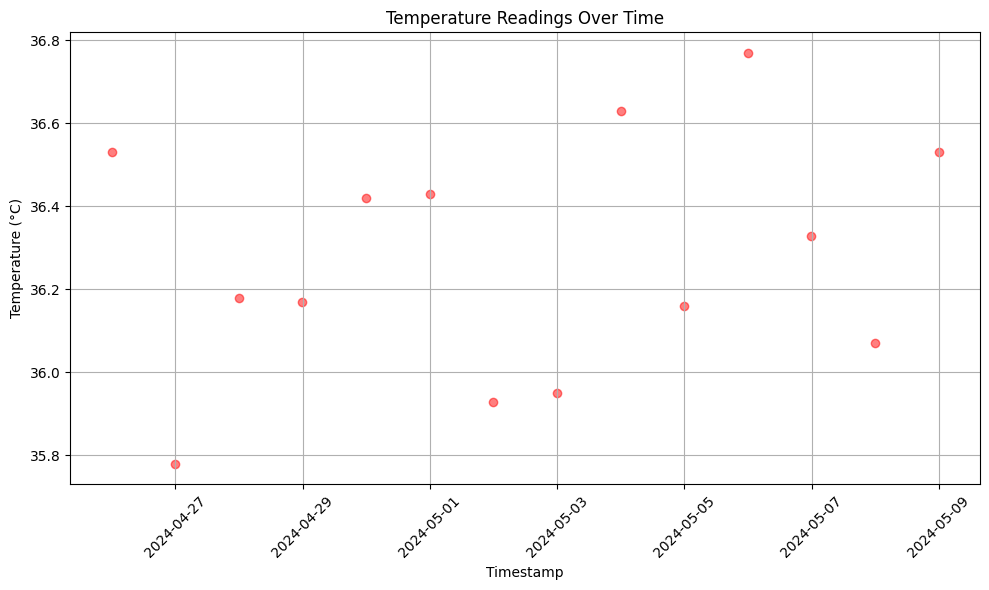

In [22]:
# Scatter plot of temperature readings over time
plt.figure(figsize=(10, 6))
plt.scatter(pd.to_datetime(detect['ts']), detect['temp'], color='r', alpha=0.5)
plt.title('Temperature Readings Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


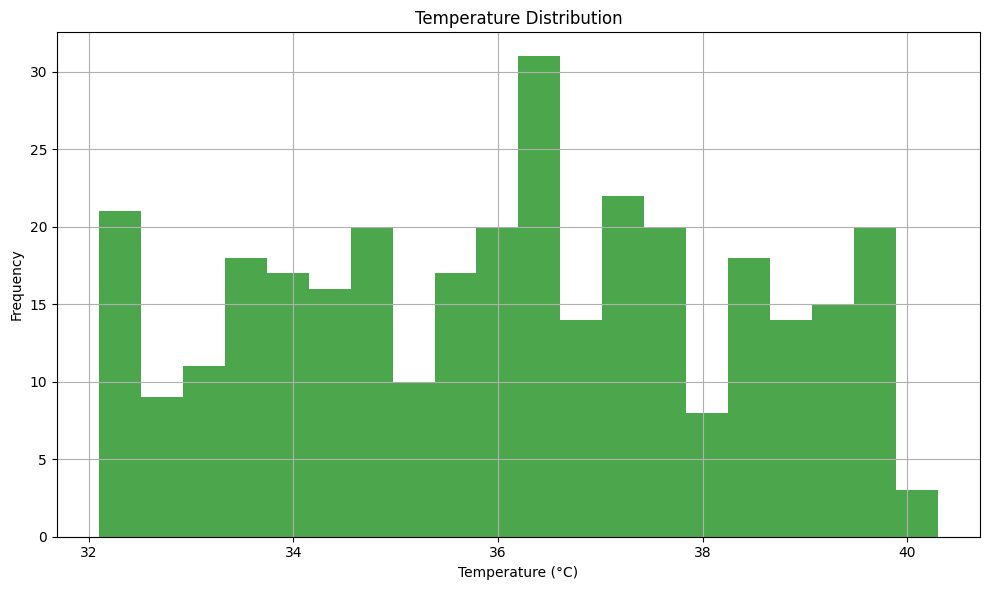

In [24]:
# Histogram of temperature distribution
plt.figure(figsize=(10, 6))
plt.hist(temp['temp'], bins=20, color='g', alpha=0.7)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

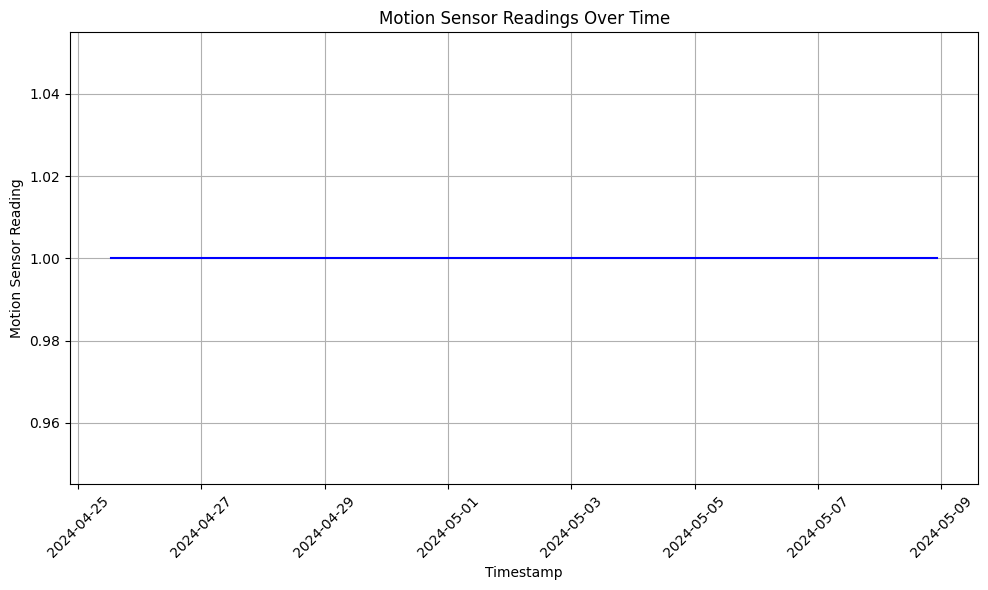

In [25]:
# Time series plot of motion sensor readings over time
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(motion['ts']), motion['sensor'], color='b')
plt.title('Motion Sensor Readings Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Motion Sensor Reading')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

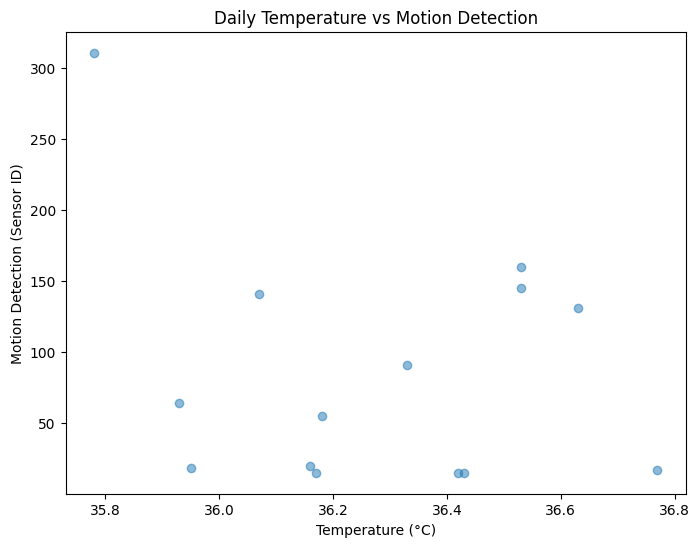

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(detect['temp'], detect['sensor'], alpha=0.5)
plt.xlabel('Temperature (°C)')
plt.ylabel('Motion Detection (Sensor ID)')
plt.title('Daily Temperature vs Motion Detection')
plt.show()